<h2 style='color:green' align='center' ><font size="5.5">Classification of Anomalies  in Gastrointestinal Tract through Endoscopic Imagery  Using Convolutional Neural Network (CNN)</font></h2>


<h2 style='color:gray' ><font size="3">Loading the image set and splits using 70% of the data for training and the remaining 30% for testing</font></h2>


In [4]:
import os
import splitfolders 

input_dir = os.path.join(r'C:\Users\Lahiru\Desktop\Dataset\kvasir-dataset-v2')
output_dir = os.path.join(r'C:\Users\Lahiru\Desktop\Dataset\kvasir-dataset-v2_splitted')

splitfolders.ratio(input_dir, output=output_dir, seed=1337, ratio=(.7, .3), group_prefix=None)

Copying files: 8000 files [08:28, 15.74 files/s]


In [5]:
train_dir = os.path.join(r'C:\Users\Lahiru\Desktop\Dataset\kvasir-dataset-v2_splitted\train')
test_dir = os.path.join(r'C:\Users\Lahiru\Desktop\Dataset\kvasir-dataset-v2_splitted\val')

<h2 style='color:gray' ><font size="3">ImageDataGenerator class which is used to perform image augmentation and flow_from_directory to read the images from a big numpy array and folders containing images.</font></h2>


In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def image_generator(train_parent_directory, test_parent_directory):
    
    train_datagen = ImageDataGenerator(rescale=1/255)
    test_datagen = ImageDataGenerator(rescale=1/255)
    
    train_generator = train_datagen.flow_from_directory(train_parent_directory,
                                  target_size = (75,75),
                                  batch_size = 214,
                                  class_mode = 'categorical',
                                  subset='training')
 
    
    test_generator = test_datagen.flow_from_directory(test_parent_directory,
                                 target_size=(75,75),
                                 batch_size = 37,
                                 class_mode = 'categorical')    
    
    return train_generator, test_generator

In [35]:
train_generator, test_generator = image_generator(train_dir, test_dir)

Found 7592 images belonging to 8 classes.
Found 4192 images belonging to 8 classes.


In [36]:
classes=['dyed-lifted-polyps', 'dyed-resection-margins', 'esophagitis', 'normal-cecum', 'normal-pylorus', 'normal-z-line', 'polyps', 'ulcerative-colitis']

<h2 style='color:gray' ><font size="3">Preparing traing and testing data sets as X_train,y_train,X_test ,y_test</font></h2>

In [37]:
import numpy as np

In [38]:
X_train=[]
for j in range(len(train_generator)):    
    for m in train_generator[j][0]: 
        X_train.append(m)
        

In [39]:
y_train=[]
for i in range(len(train_generator)):
    for k in train_generator[i][1]:  
            y_train.append(np.argmax(k))           


In [40]:
X_test=[]        
for j in range(len(test_generator)):    
    for m in test_generator[j][0]: 
        X_test.append(m)

In [41]:
y_test=[]
for i in range(len(test_generator)):
    for k in test_generator[i][1]:  
            y_test.append(np.argmax(k))
           

<h2 style='color:gray' ><font size="3">Converting the feature lists into a NumPy array.</font></h2>

In [42]:
X_train=np.array(X_train)
y_train=np.array(y_train)

X_test=np.array(X_test)
y_test=np.array(y_test)

In [43]:
X_train.shape

(7592, 75, 75, 3)

In [44]:
y_train.shape

(7592,)

<h2 style='color:gray' ><font size="3">Ploting sample images using matplotlib.pyplot</font></h2>

In [45]:
import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

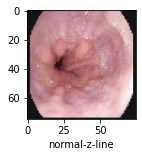

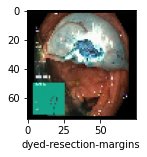

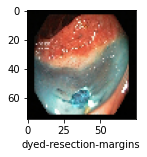

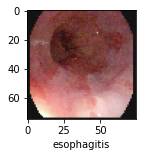

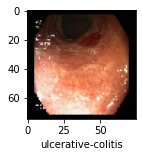

In [47]:
for i in range(5):    
    plot_sample(X_train, y_train, i)

<h2 style='color:gray' ><font size="3">Creating CNN usinga Sequential model by passing a list of layers to the Sequential constructor.</font></h2>

In [48]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [49]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(75, 75, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(8, activation='softmax')
])

<h2 style='color:gray' ><font size="3">Show model summary</font></h2>

In [50]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 73, 73, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)             

<h2 style='color:gray' ><font size="3"> Complieing the CNN model using Optimizer and loss function before training.</font></h2>

In [51]:
cnn.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

<h2 style='color:gray' ><font size="3">Fitting the dataset to train</font></h2>

In [52]:
history=cnn.fit(X_train, y_train, epochs=16)

Epoch 1/16
238/238 [==============================] - 56s 233ms/step - loss: 1.1751 - accuracy: 0.4819
Epoch 2/16
238/238 [==============================] - 61s 258ms/step - loss: 0.6702 - accuracy: 0.6899
Epoch 3/16
238/238 [==============================] - 62s 261ms/step - loss: 0.5913 - accuracy: 0.7361
Epoch 4/16
238/238 [==============================] - 61s 256ms/step - loss: 0.5342 - accuracy: 0.7566
Epoch 5/16
238/238 [==============================] - 62s 261ms/step - loss: 0.5327 - accuracy: 0.7556
Epoch 6/16
238/238 [==============================] - 61s 255ms/step - loss: 0.4817 - accuracy: 0.7833
Epoch 7/16
238/238 [==============================] - 62s 259ms/step - loss: 0.4461 - accuracy: 0.8038
Epoch 8/16
238/238 [==============================] - 65s 272ms/step - loss: 0.4052 - accuracy: 0.8203
Epoch 9/16
238/238 [==============================] - 62s 260ms/step - loss: 0.3716 - accuracy: 0.8407
Epoch 10/16
238/238 [==============================] - 62s 262ms/step - l

<h2 style='color:gray' ><font size="3">Finding  model accuracy </font></h2>

In [53]:
accuracy=cnn.evaluate(X_test,y_test)[1]
print("\nModel Accuracy =", (accuracy * 100.0),"%") 

131/131 [==============================] - 11s 79ms/step - loss: 0.1879 - accuracy: 0.9303

Model Accuracy = 93.0343508720398 %


<h2 style='color:gray' ><font size="3">Visualizeing loss history </font></h2>

In [54]:
(history.history).keys()

dict_keys(['loss', 'accuracy'])

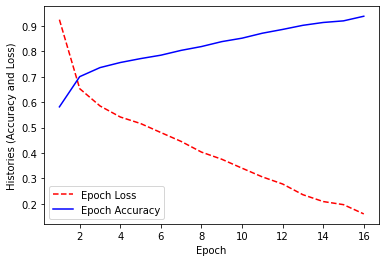

In [55]:
# Get accuracy and test loss histories
loss = history.history['loss']
accuracy = history.history['accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(loss) + 1)

# Visualize loss history
plt.plot(epoch_count, loss, 'r--')
plt.plot(epoch_count, accuracy, 'b-')
plt.legend(['Epoch Loss', 'Epoch Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Histories (Accuracy and Loss)')
plt.show();

<h2 style='color:gray' ><font size="3">Checking model prediction</font></h2>

In [56]:
y_pred = cnn.predict(X_test)

In [57]:
y_classes = [np.argmax(element) for element in y_pred]

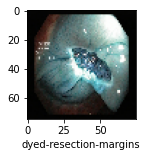

In [58]:
#Correct Anomalies 
plot_sample(X_test, y_test,336)

In [59]:
#Predict Anomalies by model
classes[y_classes[336]]

'dyed-resection-margins'

<h2 style='color:gray' ><font size="3">Computing confusion matrix to evaluate the accuracy of a classification.</font></h2>

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_classes)
cm

array([[505,  19,   0,   0,   0,   0,   0,   0],
       [ 24, 500,   0,   0,   0,   0,   0,   0],
       [  0,   0, 449,   0,   0,  75,   0,   0],
       [  0,   0,   0, 521,   0,   0,   2,   1],
       [  0,   0,   5,   0, 513,   1,   3,   2],
       [  0,   0,  89,   0,   1, 433,   1,   0],
       [  2,   0,   0,  13,   1,   0, 496,  12],
       [  0,   0,   0,  16,   1,   1,  23, 483]], dtype=int64)

<h2 style='color:gray' ><font size="3">Visualizing model accuracy using seaborn heatmap</font></h2>

([<matplotlib.axis.YTick at 0x233cbe91a48>,
 [Text(0, 0, 'dyed-lifted-polyps'),
  Text(0, 1, 'dyed-resection-margins'),
  Text(0, 2, 'esophagitis'),
  Text(0, 3, 'normal-cecum'),
  Text(0, 4, 'normal-pylorus'),
  Text(0, 5, 'normal-z-line'),
  Text(0, 6, 'polyps'),
  Text(0, 7, 'ulcerative-colitis')])

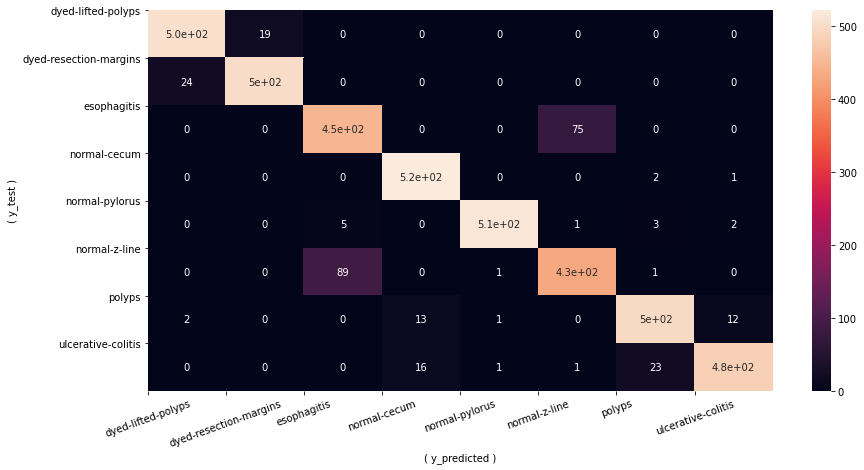

In [61]:
import seaborn as sn

plt.figure(figsize=(14,7))
sn.heatmap(cm,annot=True)

plt.ylabel('( y_test )')
plt.xlabel('( y_predicted )')
plt.xticks(range(len(classes)),classes, rotation=20)
plt.yticks(range(len(classes)),classes,rotation=0)
